In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras
import pandas as pd 





## Load synthetic regression data

In [54]:
df=pd.read_csv('./synth_data/circular_sep.csv')
input_feat=df[['x','y']].values
labels=df['label'].values
num_classes=len(np.unique(labels))
print (type(input_feat),input_feat.shape,type(labels),labels.shape)

<class 'numpy.ndarray'> (60000, 2) <class 'numpy.ndarray'> (60000,)


## Data Visualization
We visualize a small subset of the data using matplotlib

<ipython-input-55-7ab64126c534>:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(input_feat[:,0][labels==0],input_feat[:,1][[labels==0]],label=0,s=5)
<ipython-input-55-7ab64126c534>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(input_feat[:,0][labels==1],input_feat[:,1][[labels==1]],label=1,s=5)
<ipython-input-55-7ab64126c534>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array in

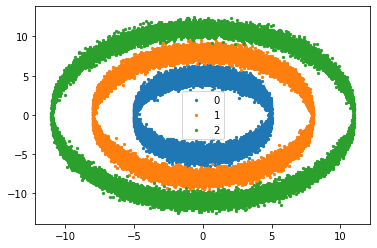

In [55]:
choice=np.random.randint(0,len(input_feat),1000)
plt.scatter(input_feat[:,0][labels==0],input_feat[:,1][[labels==0]],label=0,s=5)
plt.scatter(input_feat[:,0][labels==1],input_feat[:,1][[labels==1]],label=1,s=5)
plt.scatter(input_feat[:,0][labels==2],input_feat[:,1][[labels==2]],label=2,s=5)
plt.legend()

## Divide training and validation datasets
We divide the x and y value to training and validation datasets using numpy methods. 
It is also available in scikit-learn as [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [56]:
#labels
one_hot=np.zeros((len(labels),len(np.unique(labels))))
#print (one_hot,type(labels),labels.dtype)
one_hot[np.arange(len(labels)),labels.astype(int)]=1.
labels=one_hot

In [57]:
all_inds=np.arange(len(input_feat))
np.random.seed(145431)
np.random.shuffle(all_inds)
split_point=int(0.75*len(input_feat))
x_train,y_train=input_feat[all_inds[:split_point]],labels[all_inds[:split_point]]
x_val,y_val=input_feat[all_inds[split_point:]],labels[all_inds[split_point:]]
print (x_train.shape,y_train.shape)
print (x_val.shape,y_val.shape)

(45000, 2) (45000, 3)
(15000, 2) (15000, 3)


## Create Sequential model 
We create a model using the Sequential API of keras. You can play around with the width and depth of the network to see the speed and the accuracy of the function approximation, and the speed of training for broader vs deeper networks. 

In [58]:
width=100
depth=3

model=Sequential()
model.add(Dense(width,input_shape=(2,),activation="relu",bias_initializer="glorot_normal"))
for _ in range(depth-1):
    model.add(Dense(width,activation="relu"))
model.add(Dense(num_classes,activation="linear"))
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['acc'],
              optimizer=keras.optimizers.Adam()
             )
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 303       
Total params: 20,803
Trainable params: 20,803
Non-trainable params: 0
_________________________________________________________________


## Training the model
We train the compiled model using the inbuilt fit method of keras models, and compare the predicted output of the network for each $n$ epochs. Note that we have used epoch=1 in the input to the fit method for each of handling the plotting. For actual training purposes, the number of epochs should be directly fed into the fit method.

In [59]:
history=model.fit(x_train,y_train,epochs=10,batch_size=100,verbose=1,validation_data=(x_val,y_val))


Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2240 - acc: 0.9096 - val_loss: 0.0078 - val_acc: 0.9989
Epoch 2/10
450/450 [==============================] - 1s 3ms/step - loss: 0.0080 - acc: 0.9978 - val_loss: 0.0051 - val_acc: 0.9987
Epoch 3/10
450/450 [==============================] - 1s 3ms/step - loss: 0.0088 - acc: 0.9970 - val_loss: 0.0030 - val_acc: 0.9989
Epoch 4/10
450/450 [==============================] - 1s 3ms/step - loss: 0.0054 - acc: 0.9979 - val_loss: 0.0027 - val_acc: 0.9987
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.0079 - acc: 0.9972 - val_loss: 0.0177 - val_acc: 0.9939
Epoch 6/10
450/450 [==============================] - 1s 3ms/step - loss: 0.0043 - acc: 0.9984 - val_loss: 0.0055 - val_acc: 0.9983
Epoch 7/10
450/450 [==============================] - 1s 3ms/step - loss: 0.0052 - acc: 0.9982 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 8/10
450/450 [==============================] - 1s 3ms/step - loss: 0.

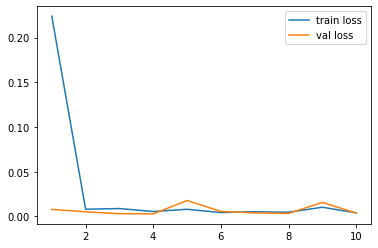

In [62]:
history_dict=history.history
epoch=list(range(1,len(history_dict['loss'])+1))
plt.plot(epoch,history_dict['loss'],label='train loss')
plt.plot(epoch,history_dict['val_loss'],label='val loss')
plt.legend()

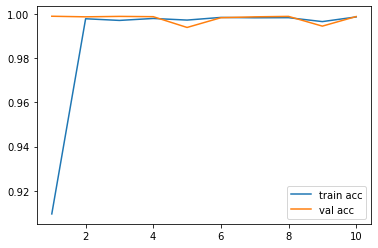

In [63]:
plt.plot(epoch,history_dict['acc'],label='train acc')
plt.plot(epoch,history_dict['val_acc'],label='val acc')
plt.legend()